In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import animation

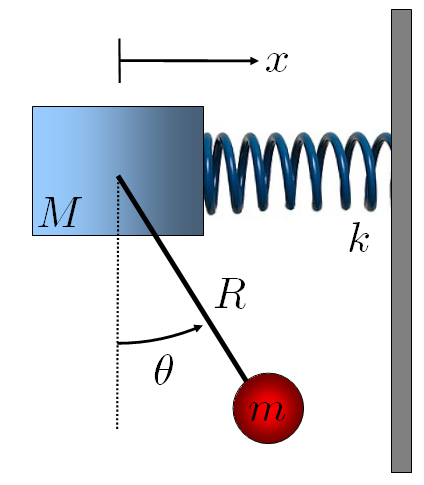

In [19]:
t,g = smp.symbols('t g')
m1, m2, k = smp.symbols('m1 m2 k')
R = smp.symbols('R')

In this case our generalised coordinates are $x$ and $\theta$

In [20]:
x,theta = smp.symbols(r'x,\theta', cls=smp.Function)

Explicitly write them as functions of time $t$:

In [21]:
x = x(t)
theta = theta(t)

Find the derivatives: $\dot\theta$, $\ddot\theta$, $\dot x$, $\ddot x$

In [22]:
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)
x_d = smp.diff(x, t)
x_dd = smp.diff(x_d, t)

Express kinetic and potential energy in terms of the generalised coordinates

In [23]:
# Kinetic energy: 1/2 M * V * V
T1 = 1/2* m2 *(smp.diff((R*smp.sin(theta) + x),t)**2 + smp.diff(-R*smp.cos(theta),t)**2)
T2 = 1/2* m1 *(smp.diff(x,t))**2

# Potential energy: m*g*h
V1 = -m2* g *R*smp.cos(theta) + 1/2*k*x**2

L = T1 + T2 - V1

Get Lagrnage's Equations: $$ \frac{\partial L}{\partial \theta} - \frac{d}{dt}\frac{\partial L}{\partial \dot\theta} = 0   $$
$$ \frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot x} = 0   $$

In [24]:
L

R*g*m2*cos(\theta(t)) - 0.5*k*x(t)**2 + 0.5*m1*Derivative(x(t), t)**2 + 0.5*m2*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(x(t), t))**2)

In [25]:
LE1 = smp.diff(L,theta) - smp.diff(smp.diff(L,theta_d),t).simplify()
LE2 = smp.diff(L,x) - smp.diff(smp.diff(L,x_d),t).simplify()

In [26]:
sols = smp.solve([LE1,LE2],(theta_dd,x_dd), simlpify=True, rational=False)

In [27]:
sols[theta_dd]

-1.0*R*m2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(1.0*R*m1 - 1.0*R*m2*cos(\theta(t))**2 + 1.0*R*m2) - 1.0*g*m1*sin(\theta(t))/(1.0*R*m1 - 1.0*R*m2*cos(\theta(t))**2 + 1.0*R*m2) - 1.0*g*m2*sin(\theta(t))/(1.0*R*m1 - 1.0*R*m2*cos(\theta(t))**2 + 1.0*R*m2) + 1.0*k*x(t)*cos(\theta(t))/(1.0*R*m1 - 1.0*R*m2*cos(\theta(t))**2 + 1.0*R*m2)

With the solution for the equations of motion of the system, undo the symbolic expression and perform integration. We now have an equation dependant on $\dot\theta$ and other parameters, we have indeed two equations (symilar to state space representation). In this case we will assume $z_1 = \dot\theta_1$.

In [28]:
dz1dt_f = smp.lambdify((t,g,m1,m2,k,R,theta,theta_d,x,x_d),sols[theta_dd])
dthetadt_f = smp.lambdify(theta_d,theta_d)
dz2dt_f = smp.lambdify((t,g,m1,m2,k,R,theta,theta_d,x,x_d),sols[x_dd])
dxdt_f = smp.lambdify(x_d,x_d)

Define a functions to solve for the system of ODEs

In [29]:
def dSdt(S,t,g,m1,m2,k,R):
    theta, z1, x, z2 = S
    return [dthetadt_f(z1), dz1dt_f(t,g,m1,m2,k,R,theta,z1,x,z2), dxdt_f(z2), dz2dt_f(t,g,m1,m2,k,R,theta,z1,x,z2)]

In [34]:
t_final = 10
frms = 25*t_final
t = np.linspace(0,10,frms)
g = 9.81
m1 = 0.5
m2 = 2
k = 10
R = 1
ans = odeint(dSdt, y0 =[0,0,1,0], t=t, args=(g,m1,m2,k,R))

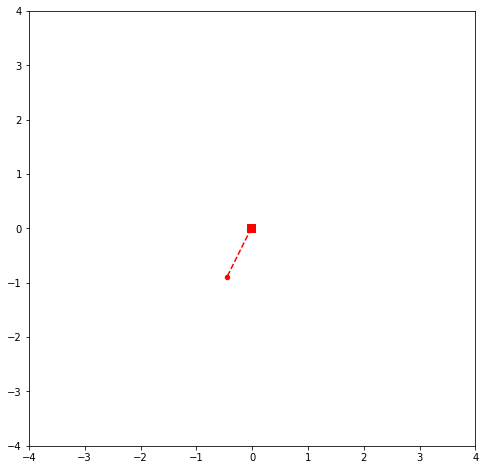

In [35]:
x2, y2 = ans[:,2], np.zeros(len(ans[:,2]))
x1 = x2 + R*np.sin(ans[:,0])
y1 = -R*np.cos(ans[:,0])


fig, ax = plt.subplots(1,1,figsize=(8,8))
def update(i):
# clear the axis each frame
    ax.clear()
    # replot things
    ax.scatter(x1[i],y1[i],s = 20, c = 'r')
    ax.scatter(x2[i],y2[i],s = 70, c = 'r',marker='s')
    
    ax.plot([x2[i],x1[i]],[y2[i],y1[i]],c= 'r',linestyle='--')
    lim = 4
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))

ani = animation.FuncAnimation(fig, update, frames=frms, interval=1)
ani.save('Pendulm_Cart_Spring.gif',writer='pillow',fps=25)
